# Etivity 5 Higher Dimensions
## Name: Martin Power
## ID      : 9939245

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [152]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math

# Additional two libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Also adding Pandas to import CSVs
import pandas as pd

# Task 4
* Perform classification on dataset_1 using an SVM with linear kernel and experiment with the C-parameter to find the widest margin solution with a hard margin and a soft margin. 

In [153]:
df1 = pd.read_csv("./dataset_1.csv")
df1 = df1.drop(['Unnamed: 0'],axis=1)
df1.describe()

,0,1,2
count,10001.000000,10001.000000,10001.000000
mean,0.082508,-0.004040,0.668233
std,0.615153,0.575639,0.470871
min,-0.999635,-1.400000,0.000000
25%,-0.496767,-0.496319,0.000000
50%,0.208210,-0.006960,1.000000
75%,0.614940,0.491170,1.000000
max,0.999983,0.999918,1.000000


In [154]:
df1.head()

,0,1,2
0,-0.331982,-0.926029,1.0
1,-0.819310,-0.242368,0.0
2,0.922427,0.499088,1.0
3,-0.570793,0.562286,0.0
4,0.375817,-0.941165,1.0


In [155]:
df1.tail()

,0,1,2
9996,0.628792,-0.562407,1.0
9997,0.595028,0.646407,1.0
9998,0.246373,0.240260,1.0
9999,-0.338258,0.581075,0.0
10000,-0.950000,-1.400000,1.0


In [156]:
# target attribute
y = df1['2']

# predictor attributes
X = df1.drop('2', axis=1).values

In [157]:
def print_dataset(X, y):
    # Plot the dataset
    
    # Assign colours based on the labels (1,-1) = (steelblue,darkred)
    colors = ['steelblue' if label == 1 else 'darkred' for label in y]
       
    # Plot Training Data
    plt.rcParams["figure.figsize"] = (10, 5) 
    plt.title("Dataset")
    plt.scatter(X[:,0], X[:,1], color=colors) 
    
    plt.show() 

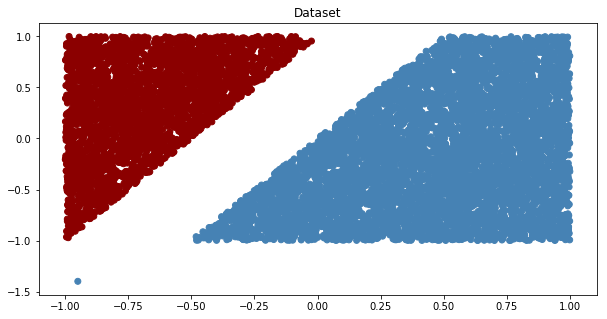

In [158]:
print_dataset(X,y)

In [159]:
# Split into test set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
# Function to plot decision boundary. Adapted from reference code provided in notebook
def plot_svm_results(svmc, X, y, X_test, y_test):

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svmc.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(svmc.support_vectors_[:, 0], svmc.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    # Calculate model score
    score = f'{svmc.score(X_test,y_test):.2f}'
    #score = str(svmc.score(X_test,y_test))
    
    # Only linear kerenl provides coef_ for calculating margin
    if(svmc.kernel=='linear'):
        # Calculate width of street/margin
        margin = 1 / np.sqrt(np.sum(svmc.coef_** 2))
        margin_string = f'{margin:.2f}'
        plt.title('SVM with C = ' + str(svmc.C) + ", kernel = " + svmc.kernel + " and margin = " + margin_string+". Model Score = "+score)
    else:
        plt.title('SVM with C = ' + str(svmc.C) + " and kernel = " + svmc.kernel + ". Model Score = "+score)
    
 
    plt.show()

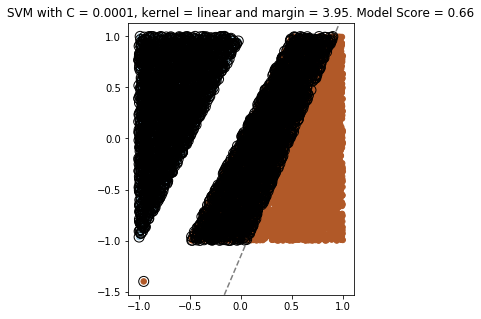

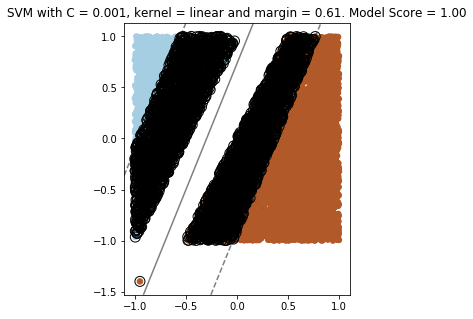

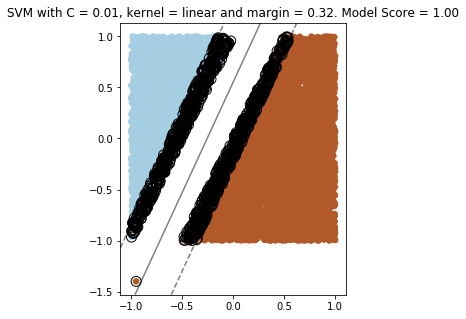

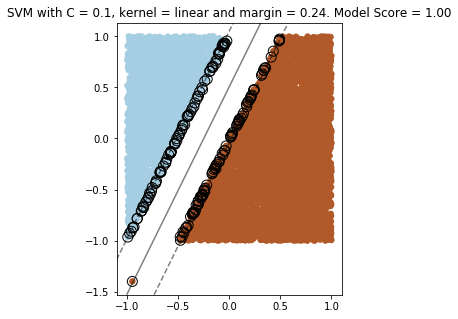

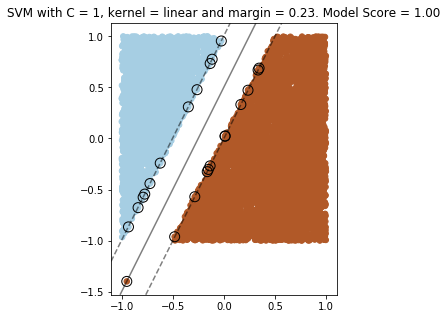

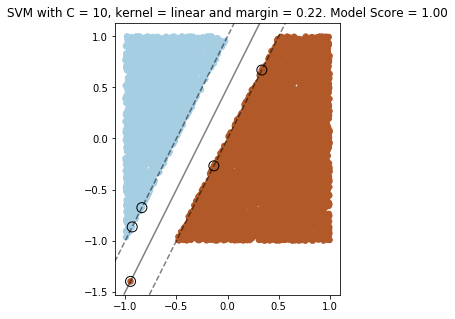

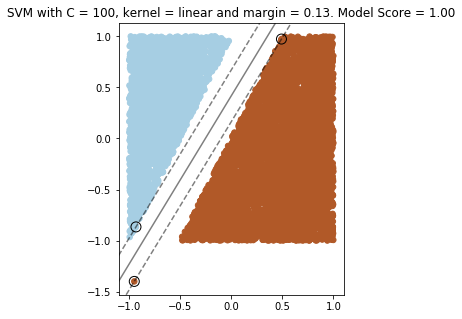

In [161]:
# Run a number of C values to show impact to hard and soft margin
t4_C_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

for i in range(len(t4_C_vals)):
    # Set kernel to 'linear' for task4
    t4_kernel = 'linear'

    t4_svm = svm.SVC(kernel=t4_kernel, C=t4_C_vals[i])
    t4_svm.fit(X_train,y_train)
    t4_svm.score(X_test,y_test)
  
    plot_svm_results(t4_svm, X_train, y_train, X_test,y_test)

# Task 4 Conclusions

#### Preliminaries:
* Hard Margin = All instances off the street
    * **NOTE**: Hard margin is sensitive to outliers
* Soft Margin = Instances allowed on the street (even on wrong side of street) but with goal of wider street
* Large C = Harder Margin
* Smaller C = Softer Margin

#### Conclusions:

In the plots, the smallest C with a model score of 1.0 (C=0.001) delivers the widest margin (0.61) and allows a lot of instances on the street. THe outlier value is even on the wrong side of the street.

Increasting C to 0.01 reduces the margin to 0.31 and the outlier is still on wrong side of the decison boundary and there are instances on the street.

For C in the range 0.1 to 10, the instances now move from the street to the gutter and the width of the margin drops to about 0.22. The outlier is now on the decision boundary.

Finally with C=100, the hardest margin, the outlier moves to the gutter and the margin reduces to just 0.13. Further increasing C does not change these values. This examples shows how the hard margin is sensitive to outlier values and significantly reduces the margin in order to accommodate this outlier value.

For the softest margin, C=0.0001, the model score dropped to 0.66 even though the data is linearly separable

# Task 5
* Explore the provided data sets (dataset_1, dataset_2 and dataset_3) using Support Vector Machines and choose suitable kernels and hyper-parameters.

In [162]:
# Use a coarse out-of-the-box SVM search to comparse the various kernels
# This function is used before picking grid search parameters to 
# confirm intuition based on the dataset
def oob_svm_compare(X,y) : 
    # Split into test set and training set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    kernels = ['linear', 'sigmoid','rbf', 'poly']
    
    for k in kernels:
            oob_svm = svm.SVC(kernel=k)
            oob_svm.fit(X_train,y_train)
            oob_score = oob_svm.score(X_test,y_test)
            oob_score = f'{oob_svm.score(X_test,y_test):.2f}'
            print("Kernel :\t",k,"Score : \t",oob_score)

Set up lists to allow parameter grid to be set up for various dataset

Lists are based on available parameters in SVM Classifier in sklearn

In [163]:
# Parameters to be varied during grid search
# Create lists based on available parameters and pick range of values per parameter
# These lists will be used to build up the parameter grid for CV searches

# C Penalty Term
C_vals = [0.001, 0.01, 0.1, 1, 10]

# Specifies the kernel type to be used in the algorithm
kernel_vals = ['rbf', 'sigmoid', 'linear']

# Gamma : Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
gamma_vals = [0.001, 0.01, 0.1, 1, 'scale']

# Degree : Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels. (default=3)
degree_vals = [2, 3, 4 ]

# Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’. Default = 0.0
coef0_vals = [0.0, 1.0]

# Task 5.1 Dataset 1 Exploration

First of all, run the out-of-the-box SVM classifiers with the various kernels.

The expectation is that the linear kernel is sufficent for this dataset

In [164]:
oob_svm_compare(X,y)

Kernel :	 linear Score : 	 1.00
Kernel :	 sigmoid Score : 	 1.00
Kernel :	 rbf Score : 	 1.00


C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Kernel :	 poly Score : 	 0.99


Linear kernel is sufficient so set up a parameter grid that uses a linear kernel but varies C

In [165]:
param_grid = [
    {'kernel': ['linear'], 'C': C_vals,},
]

In [166]:
SVC_CV1  = svm.SVC()

# Set up grid search
grid_search_SVC1 = GridSearchCV(SVC_CV1, cv=5, param_grid=param_grid, n_jobs=-1 )

# View parameters for search
grid_search_SVC1.get_params()

{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'auto_deprecated',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False),
 'fit_params': None,
 'iid': 'warn',
 'n_jobs': -1,
 'param_grid': [{'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10]}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': None,
 'verbose': 0}

In [167]:
# Perform GridSearch
grid_search_SVC1.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [168]:
# View best parameters
grid_search_SVC1.best_params_

{'C': 10, 'kernel': 'linear'}

In [169]:
# Build new SVM classifier based on best parameters
grid_svc1 = grid_search_SVC1.best_estimator_

In [170]:
grid_svc1.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

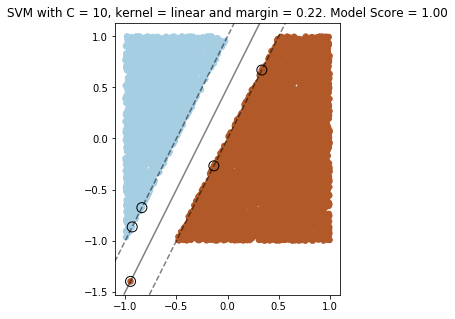

In [171]:
plot_svm_results(grid_svc1, X_train, y_train, X_test, y_test)

# Task 5.1 Conclusions

The CV search returned a value of C=10 which delivers a margin of 0.22 and a model secore of 1.0

It looks like the search chose the last value of C that delivered a model score of 1.0. For this dataset, many C-values will give a score of 1.0

In that case, it might be more interesting to set a custom 'scoring' function that would also allow the user to score against the margin delivered by a set of parameters

# Task 5.2 Dataset 2 Exploration

Import dataset, view properties and create training and test sets

In [172]:
df2 = pd.read_csv("./dataset_2.csv")
df2 = df2.drop(['Unnamed: 0'],axis=1)
df2.describe()

,0,1,2
count,10000.000000,10000.000000,10000.000000
mean,0.000081,-0.000563,0.332800
std,0.574913,0.274366,0.471239
min,-0.999780,-0.951513,0.000000
25%,-0.506704,-0.182047,0.000000
50%,0.001152,-0.002540,0.000000
75%,0.494439,0.180595,1.000000
max,0.999979,0.956530,1.000000


In [173]:
df2.head()

,0,1,2
0,0.799315,0.219275,0.0
1,-0.731615,-0.403627,1.0
2,0.424460,0.138607,0.0
3,0.586654,-0.187708,0.0
4,0.832493,0.241860,0.0


In [174]:
# target attribute
y2 = df2['2']

# predictor attributes
X2 = df2.drop('2', axis=1).values

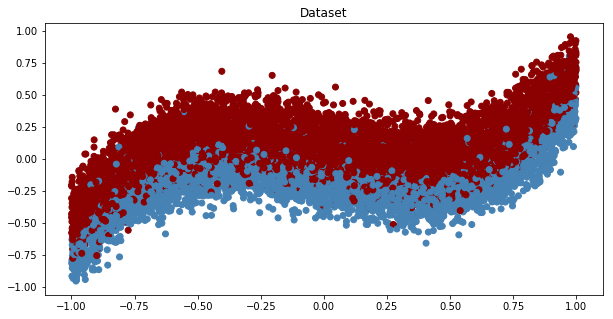

In [175]:
print_dataset(X2,y2)

First of all, run the out-of-the-box SVM classifiers with the various kernels.

The expectation is that the linear kernel will not perform well as the data is not linearly separable and that an rbf or poly kernel might suit this datset best

The dataset is 66% class 0 which means by choosing 0 all the time a model could get an accuracy of 66%. **Therefore, the no-skill value should be considered 0.66**

In [176]:
oob_svm_compare(X2,y2)

Kernel :	 linear Score : 	 0.77


C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Kernel :	 sigmoid Score : 	 0.65


C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Kernel :	 rbf Score : 	 0.86


C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Kernel :	 poly Score : 	 0.72


Linear kernel is sufficient so set up a parameter grid that uses a linear kernel but varies C

The rbf kernel scores best out of the box. The linear kernel outperforms the poly kernel. Possibly because the dataset could be divided by a diagonal line thart would deliver reasonable accuracy.

For this grid search, set up a parameter grid that explores rbf, linear and poly kernels

In [177]:
param_grid = [
    {'kernel': ['linear'], 'C': C_vals,},
    # Vary gamma with RBF kernel
    {'kernel': ['rbf'],    'C': C_vals, 'gamma': gamma_vals, },
     # Vary gamma, polynomial degree and independent term with poly kernel
    {'kernel': ['poly'],   'C': C_vals, 'gamma': gamma_vals, 'degree' : degree_vals, 'coef0' : coef0_vals, }
]

Run grid search for dataset_2

In [178]:
SVC_CV2  = svm.SVC()

# Set up grid search
grid_search_SVC2 = GridSearchCV(SVC_CV2, cv=5, param_grid=param_grid, n_jobs=-1 )

# View parameters for search
grid_search_SVC2.get_params()

{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'auto_deprecated',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False),
 'fit_params': None,
 'iid': 'warn',
 'n_jobs': -1,
 'param_grid': [{'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10]},
  {'kernel': ['rbf'],
   'C': [0.001, 0.01, 0.1, 1, 10],
   'gamma': [0.001, 0.01, 0.1, 1, 'scale']},
  {'kernel': ['poly'],
   'C': [0.001

In [179]:
# Perform GridSearch
grid_search_SVC2.fit(X2, y2)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10]}, {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 'scale']}, {'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 'scale'], 'degree': [2, 3, 4], 'coef0': [0.0, 1.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [180]:
# View best parameters
grid_search_SVC2.best_params_

{'C': 1, 'coef0': 1.0, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

In [181]:
# Build new SVM classifier based on best parameters
grid_svc2 = grid_search_SVC2.best_estimator_

In [182]:
# Split into test set and training set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [183]:
grid_svc2.fit(X2_train, y2_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

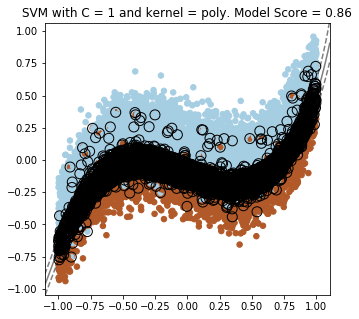

In [184]:
plot_svm_results(grid_svc2, X2_train, y2_train, X2_test, y2_test)

# Task 5.2 Conclusions

Out of the box, SVM with RBF kernel delivered a model score of 0.86. After grid search, the best parameters returned where still an RBF kernel but with C=10. 

Even though grid search did not manage to improve the score with the RBF kernel, it also proved that using a linear or a poly kernel will not outperform RBF for this dataset

# Task 5.3 Dataset 3 Exploration

Import dataset, view properties and create training and test sets

In [185]:
df3 = pd.read_csv("./dataset_3.csv")
df3 = df3.drop(['Unnamed: 0'],axis=1)
df3.describe()

,0,1,2
count,10000.000000,10000.000000,10000.00000
mean,-0.004890,-0.002304,0.88240
std,0.612958,0.616565,0.32215
min,-0.999962,-0.999991,0.00000
25%,-0.571095,-0.585002,1.00000
50%,-0.007848,-0.007517,1.00000
75%,0.561483,0.585625,1.00000
max,0.999805,0.999790,1.00000


In [186]:
df3.head()

,0,1,2
0,-0.532786,0.661453,1.0
1,-0.500866,0.695587,1.0
2,-0.697046,-0.116419,1.0
3,0.557011,0.332436,1.0
4,-0.012738,0.858232,1.0


In [187]:
# target attribute
y3 = df3['2']

# predictor attributes
X3 = df3.drop('2', axis=1).values

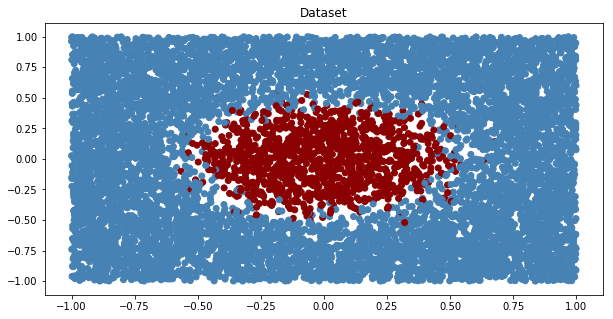

In [188]:
print_dataset(X3,y3)

First of all, run the out-of-the-box SVM classifiers with the various kernels.

The expectation is that the linear kernel will not perform well as the data is not linearly separable but that RBF should suit this dataset which looks to need a circular decision boundary

The dataset is heavily imbalanced with class 1 accounting for 88% of the data so by choosing all examples to be class 1, an **accuracy of 88% could be guaranted performance above 88% should be considered skillful**

In [189]:
oob_svm_compare(X3,y3)

Kernel :	 linear Score : 	 0.88


C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Kernel :	 sigmoid Score : 	 0.81
Kernel :	 rbf Score : 	 0.99


C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Kernel :	 poly Score : 	 0.88


Out of the box, the RBF kernel is delivering 99% accuracy.

Therefore, for this grid search, set up a parameter grid that explores rbf kernel only

**NOTE**: As expected the linear kernel provided the no-skill value of 88%, as did poly. Sigmoid did not even reach this value!

In [190]:
param_grid = [
    # Vary gamma with RBF kernel
    {'kernel': ['rbf'],    'C': C_vals, 'gamma': gamma_vals, },
]

In [191]:
SVC_CV3  = svm.SVC()

# Set up grid search
grid_search_SVC3 = GridSearchCV(SVC_CV3, cv=5, param_grid=param_grid, n_jobs=-1 )

# View parameters for search
grid_search_SVC3.get_params()

{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'auto_deprecated',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False),
 'fit_params': None,
 'iid': 'warn',
 'n_jobs': -1,
 'param_grid': [{'kernel': ['rbf'],
   'C': [0.001, 0.01, 0.1, 1, 10],
   'gamma': [0.001, 0.01, 0.1, 1, 'scale']}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': None,


In [192]:
# Perform GridSearch
grid_search_SVC3.fit(X3, y3)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 'scale']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [193]:
# View best parameters
grid_search_SVC3.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [194]:
# Build new SVM classifier based on best parameters
grid_svc3 = grid_search_SVC3.best_estimator_

In [195]:
# Split into test set and training set
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [196]:
grid_svc3.fit(X3_train, y3_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

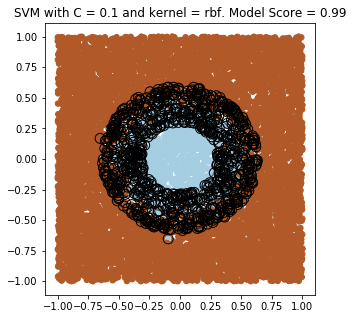

In [197]:
plot_svm_results(grid_svc3, X3_train, y3_train, X3_test, y3_test)

# Task 5.3 Conclusions

Out of the box RBF delivered a model score of 0.99 and after grid search this is still the best value delivered although the C-value has been changed from its default value of 1 to 0.1

# Task 5 Final Conclusions

Experiments showed that the linear kernel is fine for linearly separable dataset like dataset_1. For non-linearly separable datasets with more complex decision boundaries, such as dataset_2 and dataset_3, the power of the RBF kernel is illustrated.

Taking into account the distribution of the two classes in each dataset to determine what makes a model **'skilful'**, the RBF kernel demonstrated significant skill out of the box using SVM with default values and it was shown that, for these datasets at least, it was not possible possible to improve upon this accuracy using a grid search or to find a kernel that provided better performance than RBF.

**Best Parameters per Dataset**
* dataset_1 : {'C': 10, 'kernel': 'linear'}	
* dataset_2 : {'C': 10,  'gamma': 1, 'kernel': 'rbf'}
* dataset_3 : {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

**Best Accuracy per Dataset**
* dataset_1 : Test Score = 1.0	(No-Skill Value = 0.66 as 66% of samples are class1)
* dataset_2 : Test Score = 0.86   (No-Skill Value = 0.66 as 66% of samples are class0)
* dataset_3 : Test Score = 0.99   (No-Skill Value = 0.88 as 88% of samples are class1)

**NOTE** : For the unbalanced classes, I did experiment with setting *class_weight* = balanced when creating the SVM model but I found this degraded, instead of improving, results

# 15 Point Example Dataset (Demo dataset for Forum Post)

In [198]:
# Create from 15 random entries from dataset_1
# Convert to new values by cubing original point and add original point to create new poit
X_demo = np.empty([15,2])
y_demo = np.empty([15])

random.seed(100)
idx = random.sample(range(0,1000),15)
print(idx)

for i in range(len(idx)):
    rand_idx = idx[i]
    X_demo[i] = X[rand_idx]**3+X[rand_idx]
    y_demo[i] = y[rand_idx]

[149, 470, 465, 974, 789, 178, 722, 402, 749, 358, 443, 519, 819, 112, 545]


In [199]:
print(X_demo)
print(y_demo)

[[-1.97697387  0.50151661]
 [-1.91358977 -0.33622935]
 [-0.91155473  0.36453075]
 [ 0.20042021 -0.25793884]
 [ 0.60111533 -1.41280824]
 [ 1.76452589 -1.31966776]
 [ 0.55356995 -0.27836423]
 [-1.4432535  -0.17904772]
 [-0.31295624  1.86499861]
 [ 0.31982465  0.6710673 ]
 [-0.18310293 -1.39264615]
 [ 0.97328821 -0.2178078 ]
 [ 1.02920485 -0.57257397]
 [ 0.53623081  0.69815897]
 [ 0.36510741 -0.1501749 ]]
[0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]


In [200]:
idx = random.sample(range(0,1000),15)

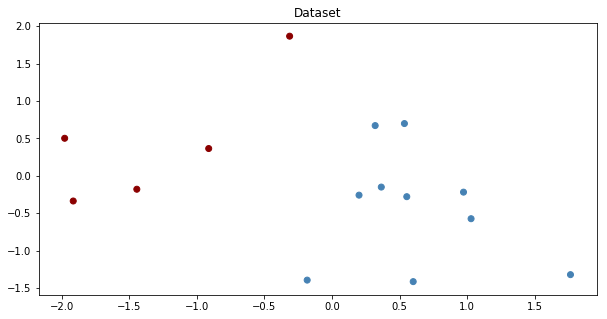

In [201]:
print_dataset(X_demo,y_demo)

# Demo Dataset with Linear Kernel

In [202]:
demo_svm = svm.SVC(kernel='linear', C=10)
demo_svm.fit(X_demo,y_demo)
demo_svm.score(X_demo, y_demo)

1.0

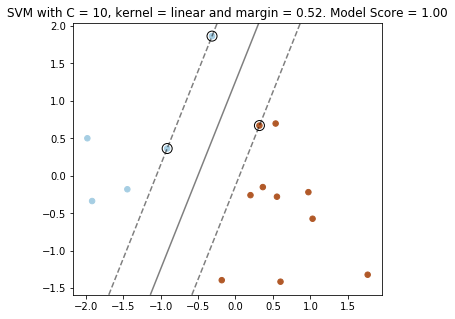

In [203]:
plot_svm_results(demo_svm, X_demo, y_demo, X_demo, y_demo)

In [204]:
print(demo_svm.support_vectors_)

[[-0.91155473  0.36453075]
 [-0.31295624  1.86499861]
 [ 0.31982465  0.6710673 ]]


In [205]:
demo_svm.score(X_demo, y_demo)

1.0

# Demo Dataset with RBF Kernel

In [206]:
demo_svm = svm.SVC(kernel='rbf', C=10)
demo_svm.fit(X_demo,y_demo)
demo_svm.score(X_demo, y_demo)

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

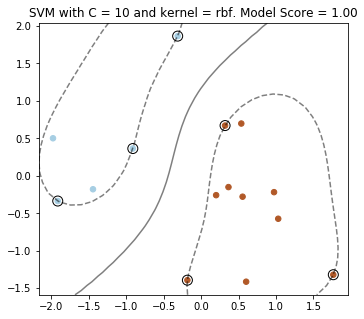

In [207]:
plot_svm_results(demo_svm, X_demo, y_demo, X_demo, y_demo)

In [208]:
print(demo_svm.support_vectors_)

[[-1.91358977 -0.33622935]
 [-0.91155473  0.36453075]
 [-0.31295624  1.86499861]
 [ 1.76452589 -1.31966776]
 [ 0.31982465  0.6710673 ]
 [-0.18310293 -1.39264615]]


In [209]:
demo_svm.score(X_demo, y_demo)

1.0

In [210]:
# Function to plot PNG
def plot_svm_results_with_orig(svmc, X, y, img_name='default.png'):
    
    plt.subplots(1, 2, figsize=(15, 5))
    
        
    plt.subplot(1,2,1)
    
    ax0 = plt.gca()
    ax0.set_aspect(aspect=1)
    plt.title('Example 15 Point Dataset')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    plt.subplot(1,2,2)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svmc.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(svmc.support_vectors_[:, 0], svmc.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    # Annotate Graph
    plt.title('SVM with C = ' + str(svmc.C) + " and kernel = " + svmc.kernel)
    #plt.title('Accuracy Boxplot with Number of Selected Features = ')
    
    plt.savefig(img_name)
    plt.show()

In [211]:
#plot_svm_results_with_orig(demo_svm, X_demo, y_demo, 'example_dataset.png')